we will try to modelize the trafic on the instagram posts. 


In [8]:
import pandas as pd
import math as m 
import matplotlib.pyplot as plt
import numpy as np

In [9]:
activity_posts = pd.read_csv("instagram_posts_0911_1111.csv", delimiter=',')
activity_posts2 = pd.read_csv("instagram_posts_1211_1611.csv", delimiter=',')



In [10]:
def cost(activity_posts,activity_posts2,number_Big_influencer,number_Small_influencer):
    sum_of_links_click = 0
    for i in range (0,activity_posts.shape[0]):
        if activity_posts["link_clicks"][i] == True:
            sum_of_links_click += 1
    for i in range (0,activity_posts2.shape[0]):
        if activity_posts2["link_clicks"][i] == True:
            sum_of_links_click += 1
    c=sum_of_links_click*0.6
    c=c+number_Big_influencer*1000+number_Small_influencer*80
    return c

def budget(activity_posts,activity_posts2,number_Big_influencer,number_Small_influencer):
    return (sum(activity_posts2["donation_val"])+sum(activity_posts["donation_val"]))-cost(activity_posts,activity_posts2,number_Big_influencer,number_Small_influencer)
print(budget(activity_posts,activity_posts2,0,10))

-237.0


([0, 4, 30, 0, 2, 2, 2, 0], [3638, 38990, 154626, 0, 12928, 53816, 33226, 10430])
20.357142857142858


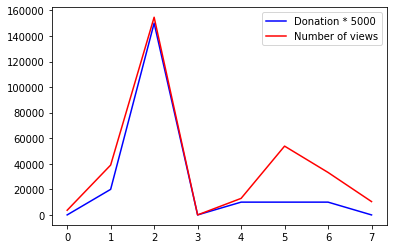

0.5025970733356303
4.0207765866850425


In [17]:
donation = [0 for i in range(8)]
nb_vue=[0 for i in range(8)]
#time = activity_posts["time"]
t = np.linspace(0,7,8)
def don(activity_posts, activity_posts2):
    
    for i in range(activity_posts.shape[0]):
        if activity_posts["date"][i] == "09/11/2017":
                nb_vue[0] += activity_posts["views"][i]
                if activity_posts["donation_tag"][i] == True:
                    donation[0] += 1

        elif activity_posts["date"][i] == "10/11/2017":
                if activity_posts["donation_tag"][i] == True:
                    donation[1] += 1
                nb_vue[1] += activity_posts["views"][i]
        elif activity_posts["date"][i] == "11/11/2017":
                if activity_posts["donation_tag"][i] == True:
                    donation[2] += 1
                nb_vue[2] += activity_posts["views"][i]

    for i in range(activity_posts.shape[0], activity_posts2.shape[0]):
            if activity_posts2["date"][i] == "12/11/2017":
                if activity_posts2["donation_tag"][i] == True:
                    donation[3] += 1
                nb_vue[3] += activity_posts2["views"][i]
            elif activity_posts2["date"][i] == "13/11/2017":
                if activity_posts2["donation_tag"][i] == True:
                    donation[4] += 1
                nb_vue[4] += activity_posts2["views"][i]
            elif activity_posts2["date"][i] == "14/11/2017":
                if activity_posts2["donation_tag"][i] == True:
                    donation[5] += 1
                nb_vue[5] += activity_posts2["views"][i]
            elif activity_posts2["date"][i] == "15/11/2017":
                if activity_posts2["donation_tag"][i] == True:
                    donation[6] += 1
                nb_vue[6] += activity_posts2["views"][i]
            elif activity_posts2["date"][i] == "16/11/2017":
                if activity_posts2["donation_tag"][i] == True:
                    donation[7] += 1
                nb_vue[7] += activity_posts2["views"][i]
    

    return donation, nb_vue
list_don_view = don(activity_posts,activity_posts2)
print(don(activity_posts,activity_posts2))
donation=[x*5000 for x in donation]
condition = (activity_posts2["donation_tag"] == True)
nouveau_df = activity_posts.loc[condition]
nouveau_df2 = activity_posts2.loc[condition]

print(nouveau_df["donation_val"].mean()+nouveau_df2["donation_val"].mean())
plt.plot(t,donation, color = "blue", label = "Donation * 5000")
plt.plot(t,nb_vue, color = "red", label = "Number of views")
plt.legend()
plt.show()

print(list_don_view[1][2]/sum(list_don_view[1]))
print(154626/np.mean(list_don_view[1]))

In [12]:
cor=np.corrcoef(donation,nb_vue)[0]
print(cor)

[1.         0.95782643]


Reposts: [1819, 19495, 77313, 0, 6464, 26908, 16613, 5215]


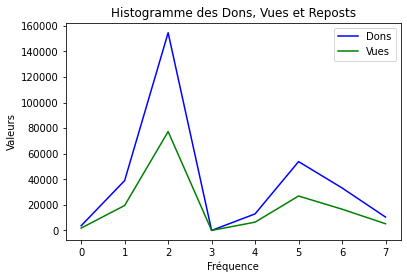

4.0207765866850425


In [18]:
nb_reposts = [0 for _ in range(8)]

for i in range(activity_posts.shape[0]):
    if activity_posts["date"][i] == "09/11/2017":
        nb_reposts[0] += activity_posts["views"][i]
    elif activity_posts["date"][i] == "10/11/2017":
        nb_reposts[1] += activity_posts["views"][i]
    elif activity_posts["date"][i] == "11/11/2017":
        nb_reposts[2] += activity_posts["views"][i]

for i in range(activity_posts.shape[0], activity_posts2.shape[0]):
    if activity_posts2["date"][i] == "12/11/2017":
        nb_reposts[3] += activity_posts2["views"][i]
    elif activity_posts2["date"][i] == "13/11/2017":
        nb_reposts[4] += activity_posts2["views"][i]
    elif activity_posts2["date"][i] == "14/11/2017":
        nb_reposts[5] += activity_posts2["views"][i]
    elif activity_posts2["date"][i] == "15/11/2017":
        nb_reposts[6] += activity_posts2["views"][i]
    elif activity_posts2["date"][i] == "16/11/2017":
        nb_reposts[7] += activity_posts2["views"][i]

print("Reposts:", nb_reposts)

donation = [0 for _ in range(8)]
nb_vue = [0 for _ in range(8)]

tot_don = don(activity_posts, activity_posts2)[0]
tot_views = don(activity_posts, activity_posts2)[1]

#plt.hist([tot_don, tot_views, nb_reposts], bins=10, color=['blue', 'green', 'red'], edgecolor='black', alpha=0.7, label=['Dons', 'Vues', 'Reposts'])
plt.plot(t, tot_views, color='blue', label='Dons')
plt.plot(t, nb_reposts, color='green', label='Vues')
plt.xlabel('Fréquence')
plt.ylabel('Valeurs')
plt.title('Histogramme des Dons, Vues et Reposts')
plt.legend()

plt.show()
print( 77313/np.mean(nb_reposts))

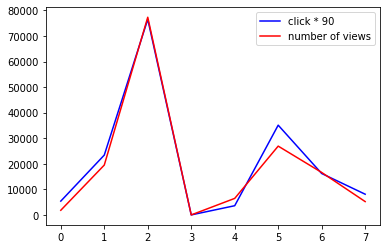

In [14]:
click = [0 for i in range(8)]
nb_vue=[0 for i in range(8)]
#time = activity_posts["time"]
t = np.linspace(0,7,8)
def click_view(activity_posts, activity_posts2):
    
    for i in range(activity_posts.shape[0]):
        if activity_posts["date"][i] == "09/11/2017":
                nb_vue[0] += activity_posts["views"][i]
                if activity_posts["link_clicks"][i] == True:
                    click[0] += 1

        elif activity_posts["date"][i] == "10/11/2017":
                if activity_posts["link_clicks"][i] == True:
                    click[1] += 1
                nb_vue[1] += activity_posts["views"][i]
        elif activity_posts["date"][i] == "11/11/2017":
                if activity_posts["link_clicks"][i] == True:
                    click[2] += 1
                nb_vue[2] += activity_posts["views"][i]

    for i in range(activity_posts.shape[0], activity_posts2.shape[0]):
            if activity_posts2["date"][i] == "12/11/2017":
                if activity_posts2["link_clicks"][i] == True:
                    click[3] += 1
                nb_vue[3] += activity_posts2["views"][i]
            elif activity_posts2["date"][i] == "13/11/2017":
                if activity_posts2["link_clicks"][i] == True:
                    click[4] += 1
                nb_vue[4] += activity_posts2["views"][i]
            elif activity_posts2["date"][i] == "14/11/2017":
                if activity_posts2["link_clicks"][i] == True:
                    click[5] += 1
                nb_vue[5] += activity_posts2["views"][i]
            elif activity_posts2["date"][i] == "15/11/2017":
                if activity_posts2["link_clicks"][i] == True:
                    click[6] += 1
                nb_vue[6] += activity_posts2["views"][i]
            elif activity_posts2["date"][i] == "16/11/2017":
                if activity_posts2["link_clicks"][i] == True:
                    click[7] += 1
                nb_vue[7] += activity_posts2["views"][i]
    

    return donation, nb_vue

click_view(activity_posts,activity_posts2)
click=[x*900 for x in click]
#condition = (activity_posts2["donation_tag"] == True)
#nouveau_df = activity_posts.loc[condition]
#nouveau_df2 = activity_posts2.loc[condition]

#print(nouveau_df["donation_val"].mean()+nouveau_df2["donation_val"].mean())
plt.plot(t,click, color = "blue", label = "click * 900")
plt.plot(t,nb_vue, color = "red", label = "number of views")
plt.legend()
plt.show()

Now we try to implement the flux 

In [15]:
#the number of followers and the price 
def sponsorship_price(followers):
    if followers < 10000:
        return followers * (165 / 10000)
    elif 10000 <= followers < 100000:
        return 5 + (followers - 10000) * (1895 / 90000)
    else:
        return 1900 + (followers - 100000) * (3100 / 90000)
    
print(sponsorship_price(1800))

29.700000000000003


Then we add in each category the interactions which occur.